$\newcommand{\ax}{\mathbf{a}_x}$
$\newcommand{\ay}{\mathbf{a}_y}$
$\newcommand{\az}{\mathbf{a}_z}$
$\newcommand{\arho}{\mathbf{a}_\rho}$
$\newcommand{\ap}{\mathbf{a}_\phi}$
$\newcommand{\ar}{\mathbf{a}_r}$
$\newcommand{\at}{\mathbf{a}_\theta}$
$\newcommand{\grad}[1]{\nabla #1}$
$\renewcommand{\div}[1]{\mathbf{\nabla} \cdot \mathbf{#1}}$
$\newcommand{\rot}[1]{\mathbf{\nabla} \times \mathbf{#1}}$
$\newcommand{\parcial}[2]{\displaystyle\frac{\partial #1}{\partial #2}}$
$\newcommand{\pard}[2]{\displaystyle\frac{\partial^2 {#1}}{\partial {#2}^2}}$
$\newcommand{\lapcart}[1]{\pard{#1}{x}+\pard{#1}{y}+\pard{#1}{z}}$
$\newcommand{\lapcili}[1]{\frac{1}{\rho}\parcial{}{\rho}\left(\rho \parcial{#1}{\rho}\right)+\frac{1}{\rho^2}\pard{#1}{\phi}+\pard{#1}{z}}$
$\newcommand{\lapesf}[1]{\frac{1}{r^2}\parcial{}{r}\left(r^2 \parcial{#1}{r}\right)+\frac{1}{r^2\sin \theta }\left(\sin \theta \, \parcial{#1}{\theta}\right)+\frac{1}{r^2\sin \theta}\pard{V}{\phi}}$



# Campos gerados por distribuições de carga

## Distribuições de carga

Linear. Densidade $\rho_L$, carga/comprimento.

Superficial. Densidade $\rho_S$, carga/área.

Volumétrica. Densidade $\rho_V$, carga/volume.

## Elemento de carga

Trabalha como se fosse um ponto de carga na distribuição considerada. Além disso, se somarmos todos os elementos ao longo da geometria (linha, área ou volume), o resultado é a carga total dela. Por exemplo, para uma distribuição linear:
$$
\begin{align}
    dQ = \rho_L \, dl \Rightarrow Q = \int_L \rho_L dl
\end{align}
$$


## Contribuição do elemento e campo total

Contribuição é calculada como se o elemento fosse uma carga pontual e o campo total pela soma de todas as contribuições (integral) da geometria. 
$$
\begin{align}
    \mathbf{E} &= \int_{L} \frac{dQ}{4\pi \epsilon_0 R^2}\mathbf{a}_R
\end{align}
$$

Assim, se o problema é de distribuição linear ou superficial, use o $dQ$ correspondente. A parte complicada é descrever como o vetor $\mathbf{R}$ de um ponto arbitrário do espaço varia em relação aos elementos de carga $dQ$. 

In [2]:
import sympy as sp
from IPython.display import display, Math

Vamos resolver primeiro o problema da linha de carga. Considere um condutor carregado com densidade linear $\rho_L$. O condutor está posicionado ao longo do eixo $z$. A extremidade inferior está no ponto $z=A$ e a superior em $z=B$. Desejamos determinar o campo elétrico provocado por esse condutor em um ponto arbitrário no espaço. Vamos resolver usando simbólico. 

In [3]:
# Definindo símbolos
# Primeiro as coordenadas do ponto e do elemento de carga
x,y,z,z0 = sp.symbols(['x','y','z','z_0'], nonzero=True)
# Constantes do problema
rL, eps0 = sp.symbols(['\\rho_L','\\epsilon_0'])
# Extremidades da liha
A,B = sp.symbols(['A', 'B'])

In [4]:
# Ponto arbitrário no espaço
P = sp.ImmutableDenseMatrix([x,y,z])
# Posição do elemento de carga
X = sp.ImmutableDenseMatrix([0,0,z0])
# Vetor deslocamento
R = P-X

In [5]:
# Construindo a integral
E = sp.Integral(rL*R/(4*sp.pi*eps0*R.norm()**3),(z0,A,B))
display(Math('\mathbf{E} = '+ sp.latex(E)))
# Agora resolve
display(Math('= ' +  sp.latex(E.doit())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Converte para coordenadas cilíndricas
# Coordenadas cilíndricas
rho = sp.symbols('\\rho', positive=True)
phi = sp.symbols('\\phi', real=True)
# Transformações de coordenadas cilíndricas
coord_cili = [(x,rho*sp.cos(phi)),(y,rho*sp.sin(phi))]
# Matriz de transformação
ret2cil = sp.ImmutableDenseMatrix([[sp.cos(phi), sp.sin(phi),0],[-sp.sin(phi), sp.cos(phi),0],[0,0,1]])
# Converte
Ecil = ret2cil@E.doit().subs(coord_cili)
Ecil = Ecil.simplify()
display(Math(sp.latex(Ecil)))

<IPython.core.display.Math object>

## Linha infinita

As expressões anteriores são grandemente simplificadas em alguns casos especiais. Por exemplo, se quisermos analisar o campo bem próximo da linha, a impressão que vamos ter é que o comprimento da linha $B-A$ é muito grande. Em termos matemáticos é como se a linha fosse "infinita". Neste caso, podemos tentar simplificar as expressões fazendo $A\rightarrow -\infty$ e $B\rightarrow \infty$. O resultado é:

In [7]:
# Resolvendo novamente, mas agora com limites infinitos
A = -sp.oo
B = sp.oo
Einf = sp.Integral(rL*R/(4*sp.pi*eps0*R.norm()**3),(z0,A,B))
display(Math(r'\mathbf{E} = ' + sp.latex(Einf) + ' = ' + sp.latex(Einf.doit())))

<IPython.core.display.Math object>

In [8]:
# Convertendo agora para coordenadas cilíndricas
E_inf_cil = ret2cil@Einf.doit().subs(coord_cili)
display(Math(r'\mathbf{E} = ' + sp.latex(E_inf_cil) + ' = ' + sp.latex(E_inf_cil.simplify())))

<IPython.core.display.Math object>

In [9]:
# Plotagem
import numpy as np
from matplotlib import pyplot as plt

a = np.arange(-2,2,.21)
a = a[a!=0]
X, Y = np.meshgrid(a,a)

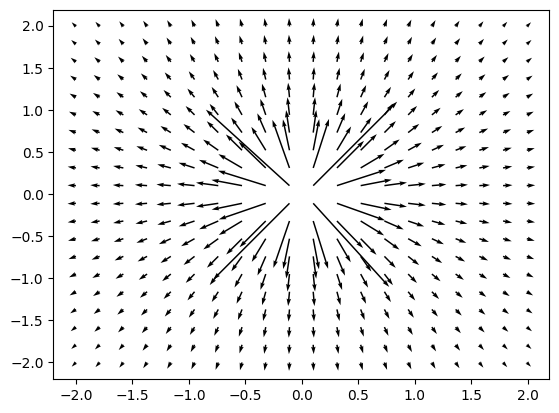

In [10]:
Efun = Einf.doit()
Efun = Efun.subs([(eps0,1e-9/(36.*np.pi)),(rL,1.e-10)]).evalf()
Ex = sp.lambdify([x,y], Efun[0])
Ey = sp.lambdify([x,y], Efun[1])
Ez = sp.lambdify([x,y], Efun[2])

#ax = plt.figure().add_subplot(projection='3d')
#ax.quiver(X,Y,Z,Ex(X,Y),Ey(X,Y),Ez(X,Y))
#plt.show()
plt.quiver(X,Y,Ex(X,Y),Ey(X,Y));

## Placa circular

In [11]:
# Vetores do problema
h = sp.symbols('h', positive=True)
# Ponto acima da placa
P = sp.ImmutableDenseMatrix([0,0,h])

In [12]:

# Elemento de carga em coordenadas retangulares
Q = sp.ImmutableDenseMatrix([x,y,0])

# Vetor deslocamento
R = P-Q
print('Vetor deslocamento: ')
display(Math(r'\mathbf{R} = ' + sp.latex(P) + '-' + sp.latex(Q) + '=' + sp.latex(R)))

# Transforma o vetor para componentes cilíndricas
print('Transforma o vetor para componentes cilíndricas: ')
display(Math(r'\mathbf{R} = ' + sp.latex(ret2cil) + sp.latex(R) + '=' + sp.latex(ret2cil@R)))
R = ret2cil@R

# Converte as coordenadas das componentes para sistema cilíndrico
print('Converte as coordenadas das componentes para sistema cilíndrico')
display(Math(r'\mathbf{R} = ' + sp.latex(R.subs(coord_cili))))
R = R.subs(coord_cili)

# Simplifica
print('Simplifica: ')
display(Math(r'\mathbf{R} = ' + sp.latex(R.simplify())))
R = R.simplify()

Vetor deslocamento: 


<IPython.core.display.Math object>

Transforma o vetor para componentes cilíndricas: 


<IPython.core.display.Math object>

Converte as coordenadas das componentes para sistema cilíndrico


<IPython.core.display.Math object>

Simplifica: 


<IPython.core.display.Math object>

In [13]:
D = sp.symbols('D',positive=True)
E = sp.Integral(sp.Integral(R*rho/(4*sp.pi*eps0*R.norm()**3),(rho,0,D/2)),(phi,0,2*sp.pi))
display(Math(r'\mathbf{E} = '+ sp.latex(E)))

<IPython.core.display.Math object>

In [14]:
Ez = sp.Integral(sp.Integral(R[2]*rho/(4*sp.pi*eps0*R.norm()**3),(rho,0,D/2)),(phi,0,2*sp.pi))
Ez

Integral(\rho*h/(4*pi*\epsilon_0*(\rho**2 + h**2)**(3/2)), (\rho, 0, D/2), (\phi, 0, 2*pi))

In [15]:
Ez.doit()

2*pi*(-h/(4*pi*\epsilon_0*sqrt(D**2/4 + h**2)) + 1/(4*pi*\epsilon_0))